<html> <img style="float:center; margin: 0px 0px 0px 0px;" src="https://docs.google.com/uc? export=download&id=1jIxUCriI-tyCAkUYHz05rk5SY_rTHRV9" width="220" align="left"/> </html> 

<figure>
<center>
<img src='https://docs.google.com/uc?export=download&id=1BmLEthy7KCNsnVFviFKX77zLmFhc47XZ' align='right'width="220"/>
    
<figcaption>

</figcaption></center>
</figure>
<center> <H1> Analyse et Programmation avec Python </H1> </center>
<center> <H6> Janvier 2020 </H6> </center>


Enseignant : Jaafar Chaaouri

Email: Jaafar.chaaouri@fsm.rnu.tn

---

# Pandas 
(**Pan**el **Da**ta)  
Pour la manipulation de données structurées.  


Basé sur Numpy mais ajoutant des identifiants aux lignes et colonnes des tableaux de données.
Les deux objets principaux sont les `Series` et le `DataFrame`.


In [1]:
import pandas as pds
import numpy as np

## Series  
un vecteur avec un **index** qui peut être autre chose que des entiers et un nom.

In [2]:
s = pds.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

In [ ]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
s[1]

0.2

In [ ]:
s2 = pds.Series([0.1, 0.2, 0.3, 0.4], index=['a', 'b', 'c', 'd'], name='un_exemple')
s2

a    0.1
b    0.2
c    0.3
d    0.4
Name: un_exemple, dtype: float64

In [ ]:
s2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [ ]:
s2['b']

0.2

En fait, c'est un peu comme un dictionnaire ordonné. D'ailleurs on peut construire un objet `Series` directement à partir d'un dictionnaire :

In [ ]:
pop_dict = {'California': 38332521,
            'Texas': 26448193,
            'New York': 19651127,
            'Florida': 19552860,
            'Illinois': 12882135}
populations = pds.Series(pop_dict)
populations

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [ ]:
populations['California']

'California'

## DataFrame
Données multidimensionnelles, chaque colonne pouvant avoir un type différent

In [3]:
# exemple de contruction à partir d'un dictionnaire
data = {'state': ['California', 'Texas', 'New York', 'Florida', 'Illinois'],
        'population': [38332521, 26448193, 19651127, 19552860, 12882135],
        'area':[423967, 695662, 141297, 170312, 149995]}
states = pds.DataFrame(data)
states

,state,population,area
0,California,38332521,423967
1,Texas,26448193,695662
2,New York,19651127,141297
3,Florida,19552860,170312
4,Illinois,12882135,149995


In [ ]:
# on peut choisir l'index
states = states.set_index('state')
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object', name='state')

In [ ]:
states

,population,area
state,,
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [ ]:
# accès à une colonne: retourne une Series
states['area']

state
California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [ ]:
# accès à une ligne par l'index
states.loc['California']

population    38332521
area            423967
Name: California, dtype: int64

In [ ]:
# accès à une ligne par le numéro de ligne
states.iloc[0]

population    38332521
area            423967
Name: California, dtype: int64

In [ ]:
# opérations sur les colonnes comme sur les Numpy array, permet de définir de nouvelles colonnes
states['density'] = states['population'] / states['area']
states

,population,area,density
state,,,
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


In [ ]:
# selectionner certaines colonnes -> retourne un DataFrame
states[['population', 'density']]

,population,density
state,,
California,38332521,90.413926
Texas,26448193,38.018740
New York,19651127,139.076746
Florida,19552860,114.806121
Illinois,12882135,85.883763


In [ ]:
# masque, filtre
states[states['density'] > 100]

,population,area,density
state,,,
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121


In [ ]:
# Question : Quels sont les 3 Etats les plus denses ?
states.sort_values(by='density', ascending=False)[:3] 

,population,area,density
state,,,
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
California,38332521,423967,90.413926


In [ ]:
# statistiques descriptives communes
states.describe()

,population,area,density
count,5.000000e+00,5.000000,5.000000
mean,2.337337e+07,316246.600000,93.639859
std,9.640386e+06,242437.411951,37.672251
min,1.288214e+07,141297.000000,38.018740
25%,1.955286e+07,149995.000000,85.883763
50%,1.965113e+07,170312.000000,90.413926
75%,2.644819e+07,423967.000000,114.806121
max,3.833252e+07,695662.000000,139.076746


### Visualisation intégrée dans pandas

In [ ]:
%matplotlib inline

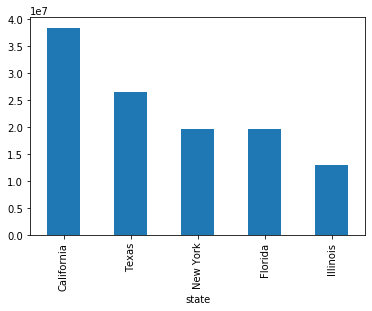

In [ ]:
states['population'].plot.bar();

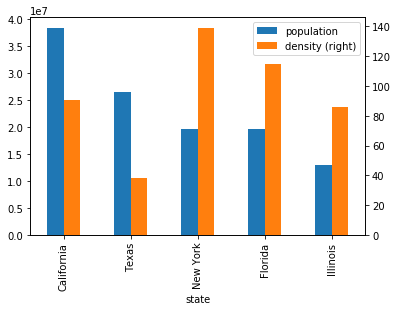

In [ ]:
states[['population', 'density']].plot.bar(secondary_y='density');

Quelques remarques sur le passage à l'échelle lorsqu'on a des données volumineuses (big data):  
- si pas trop volumineux, choisir une machine plus puissante (CPU/RAM) : aisé si l'on travaille dans le cloud (Amazon AWS, Google Cloud, Microsoft Azure, etc.) mais ça a un impact sur le coût. 
- travailler sur un cluster de machines dans un framework distribué : Spark (pyspark) 
 